In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) #$\color{red}{\text{ciao}}$

C:\Users\jsaul\AppData\Local\Temp\ipykernel_32\2925880142.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
from sklearn.decomposition import PCA
import seaborn as sns
plt.style.use('dark_background')
plt.rc("font",size=15)

In [8]:
tickers =['TSLA','MELI','AAPL','XOM','V','GS','GOLD','KO',
          'WMT','NVDA', 'AMZN', 'GOOG', 'META', 'NFLX',
          'DIS', 'BABA', 'PBR', 'BBD', 'BIIB']


prices = yf.download(tickers, period='5y')['Adj Close']

[*********************100%***********************]  19 of 19 completed


In [9]:
rets = prices.pct_change().dropna()
rets = rets/rets.std()

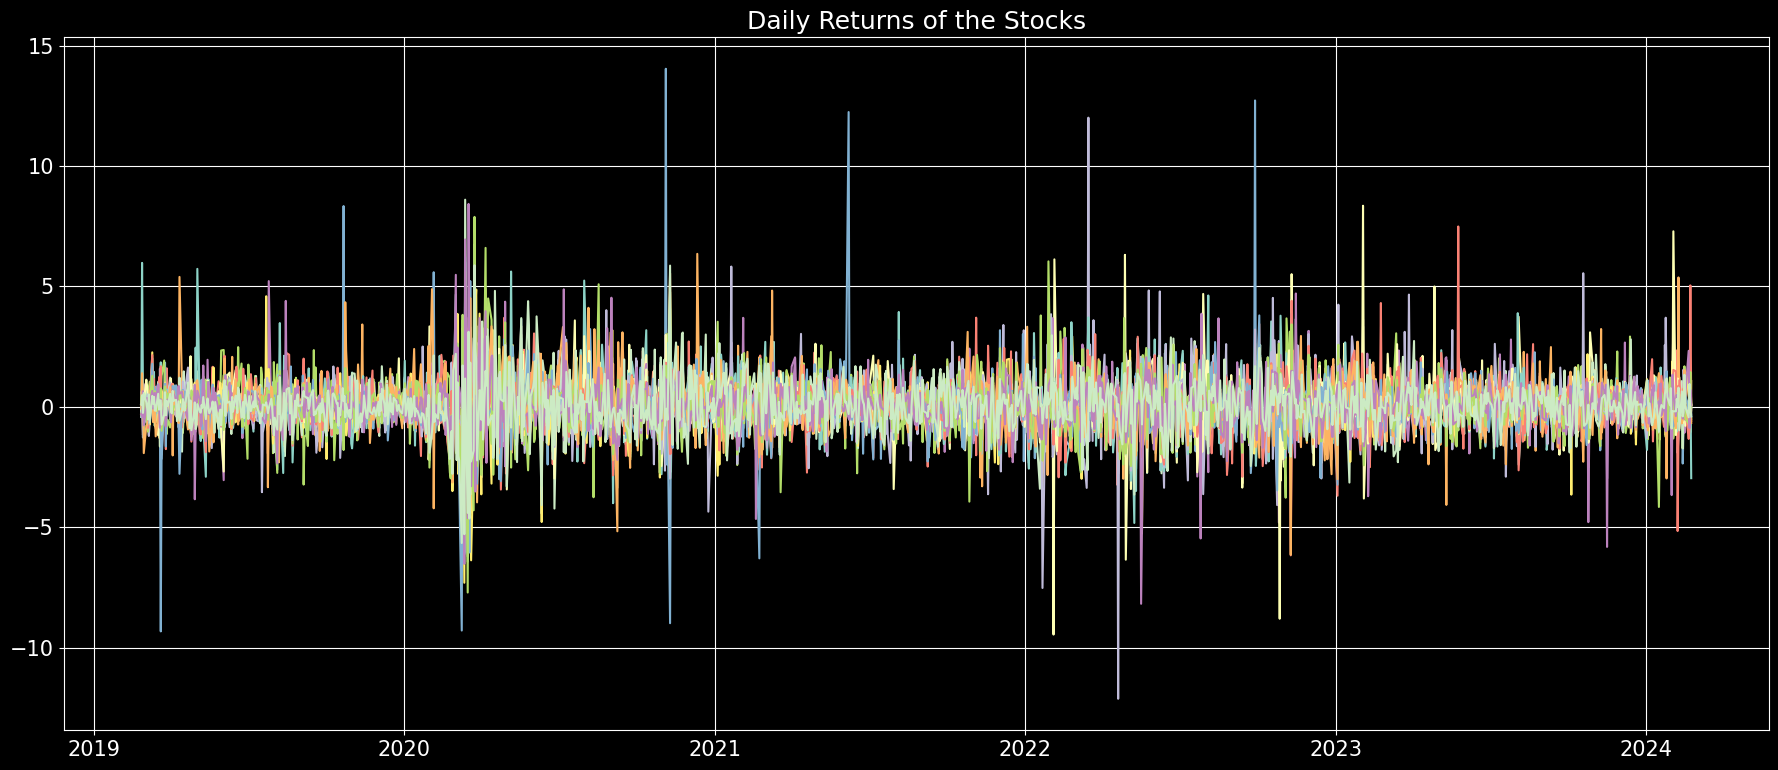

In [10]:
plt.figure(figsize = (22,9))
plt.plot(rets)
plt.title('Daily Returns of the Stocks')
plt.grid()
plt.show()

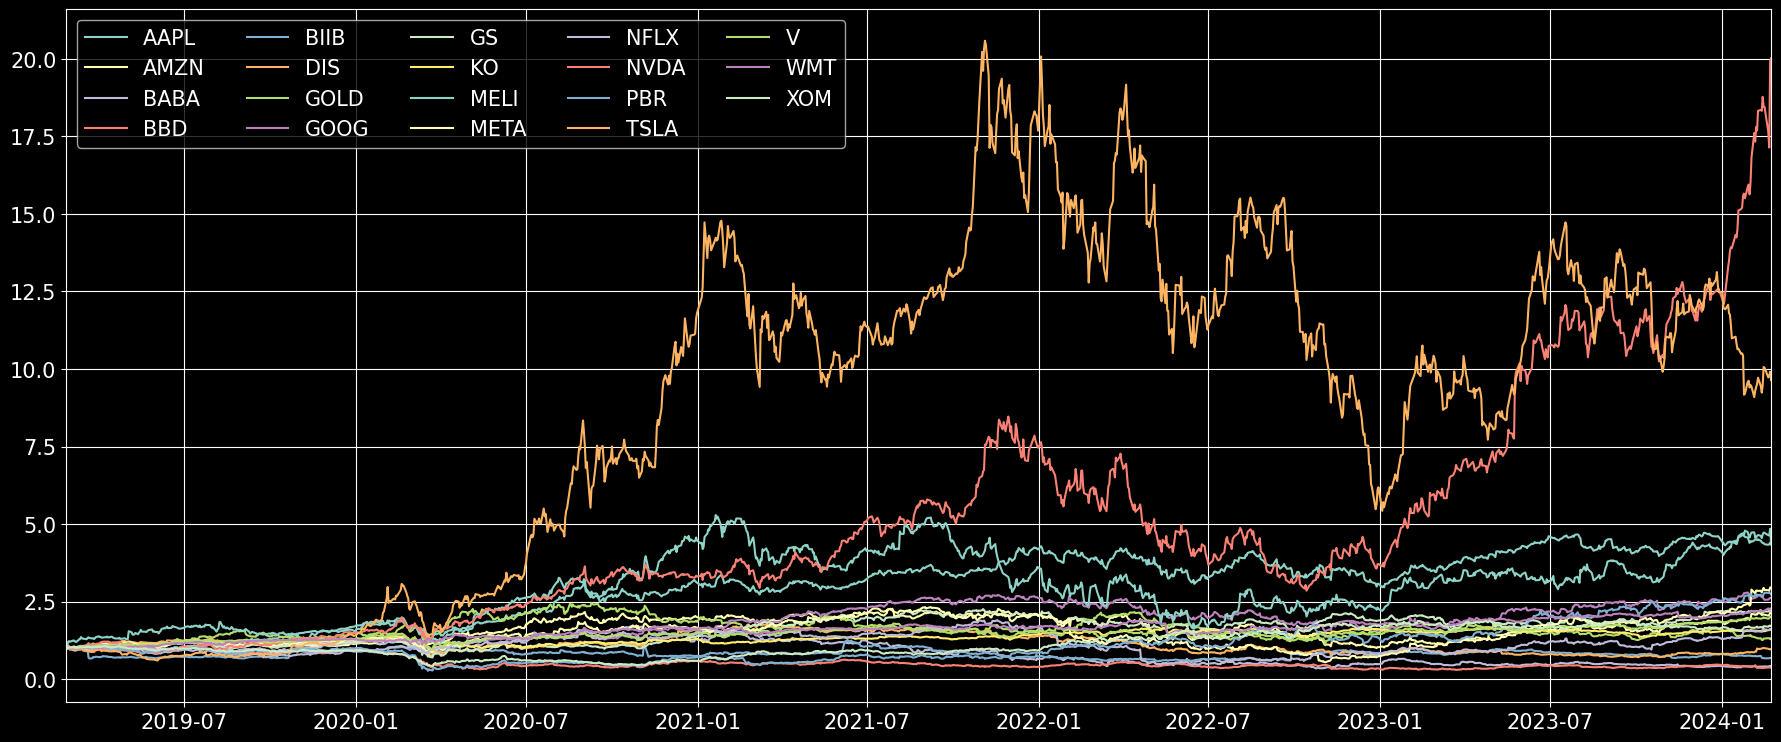

In [12]:
plt.figure(figsize = (22,9))
plt.plot(prices/prices.iloc[0])
plt.legend(rets.columns, loc = 'upper left', ncol = 5)
plt.grid()
plt.autoscale(tight = True, axis = 'x')

In [13]:
noa = len(tickers)

In [14]:
pca = PCA(noa)

In [15]:
principal = pd.DataFrame(pca.fit_transform(rets),                          
                         columns = ['PC'+str(i) for i in range(1, noa+1)], 
                         index = rets.index) 

In [16]:
loadings = pd.DataFrame(pca.components_.T,  # Gives us the matrix of loadings: how each PC affects X
                        columns = ['PC'+str(i) for i in range(1, noa+1)],
                        index = rets.columns)

In [17]:
loadings = loadings*(-1)
principal = principal*(-1)

In [18]:
loadings.dot(loadings.T)

AAPL          AMZN          BABA           BBD          BIIB  \
AAPL  1.000000e+00  2.076693e-16  3.272137e-16 -2.567530e-16  1.692014e-17   
AMZN  2.076693e-16  1.000000e+00 -3.924737e-16 -2.312726e-16 -2.961879e-16   
BABA  3.272137e-16 -3.924737e-16  1.000000e+00 -4.857688e-16 -2.931950e-17   
BBD  -2.567530e-16 -2.312726e-16 -4.857688e-16  1.000000e+00  1.264714e-17   
BIIB  1.692014e-17 -2.961879e-16 -2.931950e-17  1.264714e-17  1.000000e+00   
DIS  -3.337721e-16 -4.238579e-16  6.973824e-16 -2.937016e-16 -4.256595e-16   
GOLD  1.358026e-16  1.731723e-16  2.505845e-16 -9.018541e-17 -8.757412e-16   
GOOG -1.600054e-16  2.295811e-16  4.567914e-16  1.209523e-16 -4.588167e-17   
GS    1.478525e-16  2.935816e-18  9.377286e-17  2.673405e-16 -2.438609e-16   
KO   -2.567738e-16 -4.942880e-18  2.539243e-16 -5.500344e-16  1.224275e-16   
MELI  2.263711e-16 -3.553359e-16 -2.314840e-16 -6.536352e-16  4.957016e-16   
META  1.168277e-18 -1.013312e-16  4.295188e-16  2.444099e-16 -3.229349e-16   
NFLX -4.414884e-16  1.087564e-16  1.893862e-16 -2.401120e-16 -8.198745e-17   
NVDA -1.063327e-16 -3.602218e-16 -2.110991e-16  4.799232e-16  3.045793e-16   
PBR   1.217901e-17  2.423758e-16 -4.953944e-16  6.589315e-16  8.581872e-17   
TSLA  3.095657e-16 -1.297729e-16 -5.926870e-16  4.583184e-17 -2.475595e-17   
V     2.389708e-16 -2.894354e-16  5.136982e-16 -3.560520e-16 -1.606918e-16   
WMT  -1.787311e-16 -8.827781e-17 -9.076678e-16  5.490855e-16  1.829942e-16   
XOM  -4.966424e-17 -1.433864e-17  2.587370e-17  1.067774e-16 -2.704833e-16   

               DIS          GOLD          GOOG            GS            KO  \
AAPL -3.337721e-16  1.358026e-16 -1.600054e-16  1.478525e-16 -2.567738e-16   
AMZN -4.238579e-16  1.731723e-16  2.295811e-16  2.935816e-18 -4.942880e-18   
BABA  6.973824e-16  2.505845e-16  4.567914e-16  9.377286e-17  2.539243e-16   
BBD  -2.937016e-16 -9.018541e-17  1.209523e-16  2.673405e-16 -5.500344e-16   
BIIB -4.256595e-16 -8.757412e-16 -4.588167e-17 -2.438609e-16  1.224275e-16   
DIS   1.000000e+00  3.490322e-19 -7.943006e-17 -5.272043e-16  1.569159e-16   
GOLD  3.490322e-19  1.000000e+00  9.687310e-17  9.624124e-17  2.019508e-16   
GOOG -7.943006e-17  9.687310e-17  1.000000e+00 -9.538005e-17 -1.135383e-16   
GS   -5.272043e-16  9.624124e-17 -9.538005e-17  1.000000e+00  3.007420e-16   
KO    1.569159e-16  2.019508e-16 -1.135383e-16  3.007420e-16  1.000000e+00   
MELI  3.905768e-16 -2.140852e-16 -3.732788e-16  4.079438e-16  2.218333e-16   
META -2.201016e-16 -1.405634e-16  2.391392e-17 -2.124394e-16 -1.991862e-16   
NFLX  4.784053e-16 -2.976354e-16 -3.428392e-16  2.551953e-16 -7.901739e-16   
NVDA -1.849702e-16  2.294433e-16  2.613224e-16 -4.084471e-16  2.513447e-16   
PBR  -4.286994e-16 -2.202111e-16  2.616278e-17 -1.986094e-16 -2.939886e-16   
TSLA -2.520814e-16 -1.457074e-16 -2.494255e-16 -3.142275e-16  4.482916e-16   
V     5.619334e-17  2.627073e-16 -1.711121e-16 -8.268167e-17 -2.875593e-17   
WMT  -4.870729e-16  1.713448e-16  6.611821e-17 -2.401916e-16 -6.851535e-16   
XOM   2.878774e-16 -1.695825e-16  9.963789e-18 -3.215432e-16  2.532876e-16   

              MELI          META          NFLX          NVDA           PBR  \
AAPL  2.263711e-16  1.168277e-18 -4.414884e-16 -1.063327e-16  1.217901e-17   
AMZN -3.553359e-16 -1.013312e-16  1.087564e-16 -3.602218e-16  2.423758e-16   
BABA -2.314840e-16  4.295188e-16  1.893862e-16 -2.110991e-16 -4.953944e-16   
BBD  -6.536352e-16  2.444099e-16 -2.401120e-16  4.799232e-16  6.589315e-16   
BIIB  4.957016e-16 -3.229349e-16 -8.198745e-17  3.045793e-16  8.581872e-17   
DIS   3.905768e-16 -2.201016e-16  4.784053e-16 -1.849702e-16 -4.286994e-16   
GOLD -2.140852e-16 -1.405634e-16 -2.976354e-16  2.294433e-16 -2.202111e-16   
GOOG -3.732788e-16  2.391392e-17 -3.428392e-16  2.613224e-16  2.616278e-17   
GS    4.079438e-16 -2.124394e-16  2.551953e-16 -4.084471e-16 -1.986094e-16   
KO    2.218333e-16 -1.991862e-16 -7.901739e-16  2.513447e-16 -2.939886e-16   
MELI  1.000000e+00 -1.814386e-17  

In [19]:
var = pca.explained_variance_ratio_  # Percentage of variance explained by each of the selected components

var_factors = pd.DataFrame(columns = ['PC', 'Variance'])

var_factors['PC'] = ['PC'+str(i) for i in range(1, noa+1)]
var_factors['Variance']= [var[i].round(4) for i in range(len(var))]

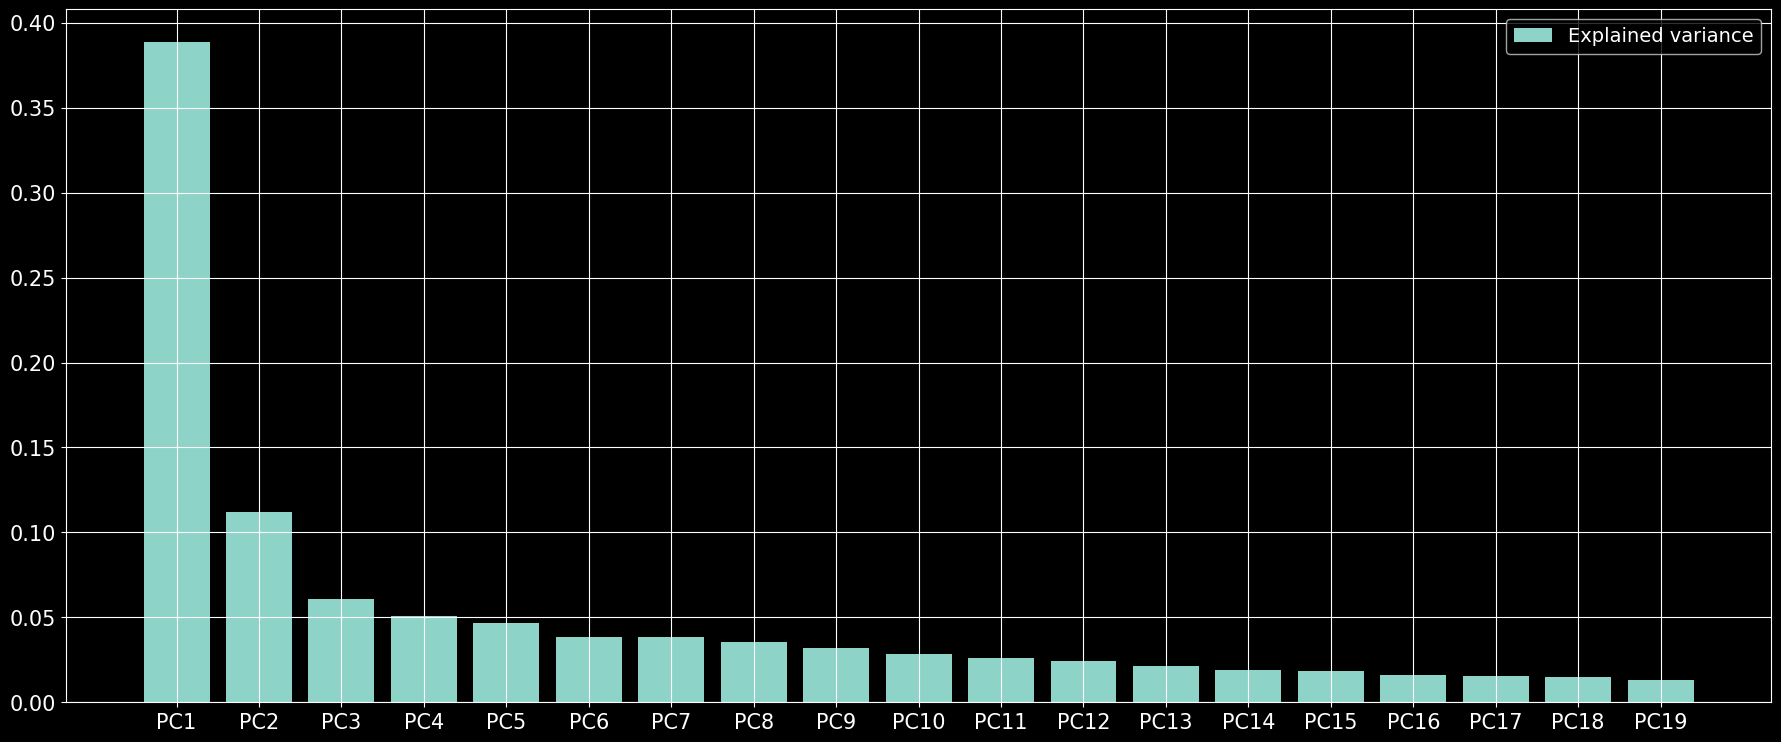

In [20]:
fig = plt.figure(figsize = (22,9))
plt.bar(var_factors['PC'], var_factors['Variance'], label = 'Explained variance')
plt.legend(loc = 'upper right', fontsize = 14)
plt.grid()

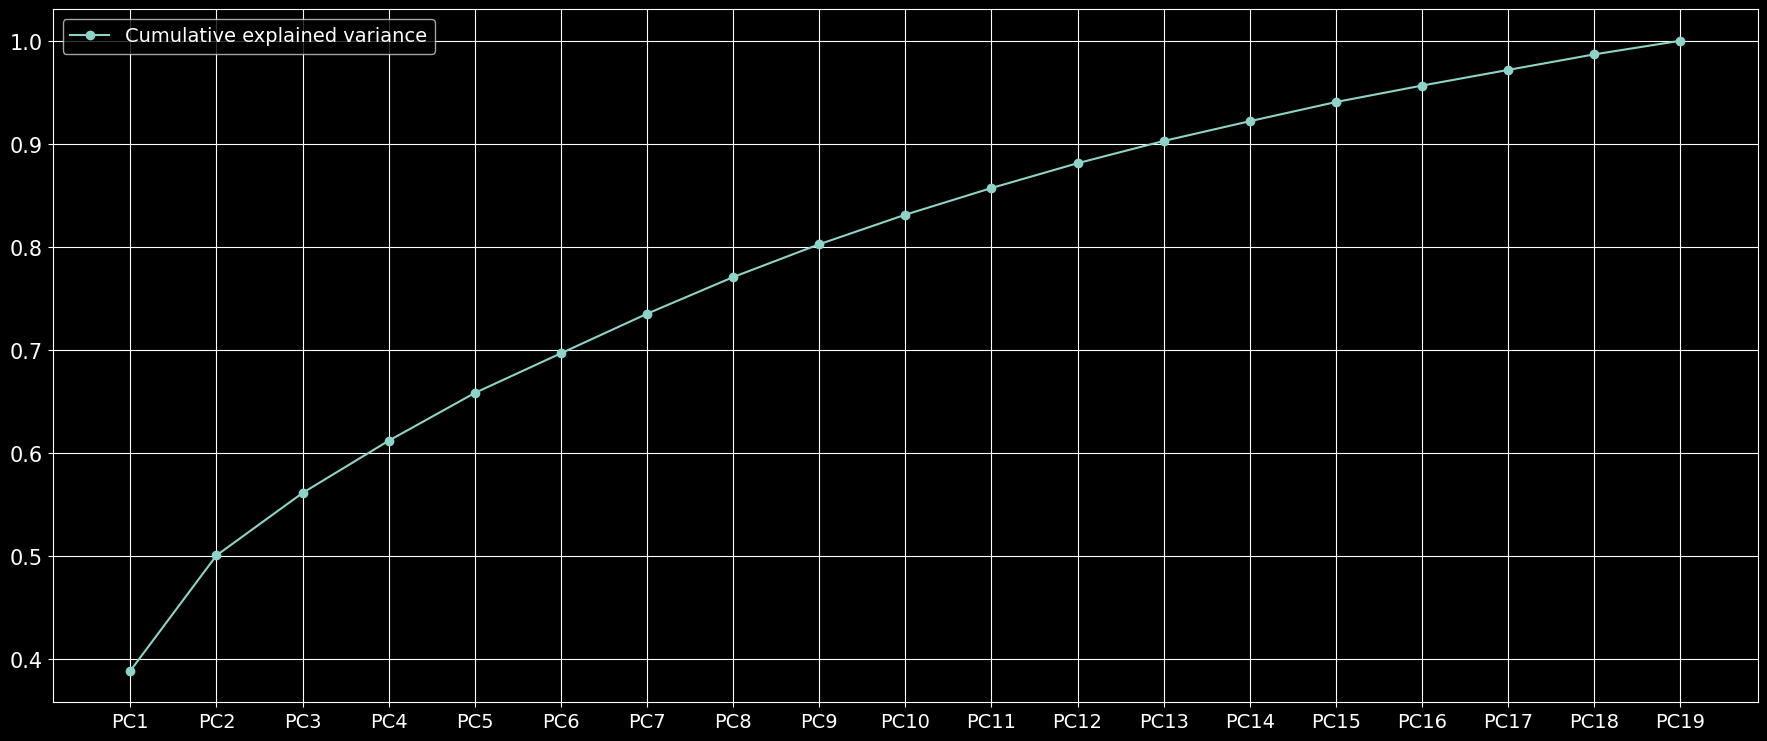

In [21]:
fig = plt.figure(figsize = (22,9))
plt.plot(var_factors['PC'], np.cumsum(var_factors['Variance']), label = 'Cumulative explained variance', marker = 'o')
plt.legend(loc = 'upper left', fontsize = 14)
plt.xticks(size = 14)
plt.grid()

In [22]:
for x in loadings.columns:
    loadings[x] = loadings[x]/loadings['PC1'].sum()
'''loadings[['PC2', 'PC4', 'PC8']] = loadings[['PC2', 'PC4', 'PC8']]*(-1)
for x in loadings.columns[1:]:
    loadings[x] = loadings[x]/loadings[x].max()'''
principal = rets.dot(loadings)

In [23]:
for x in loadings.columns:
    loadings[x] = loadings[x]/loadings['PC1'].sum()
for x in loadings.columns:
    loadings[x] = loadings[x]/abs(loadings[x]).sum()

In [24]:
loadings = loadings.sort_values('PC2', ascending = False)

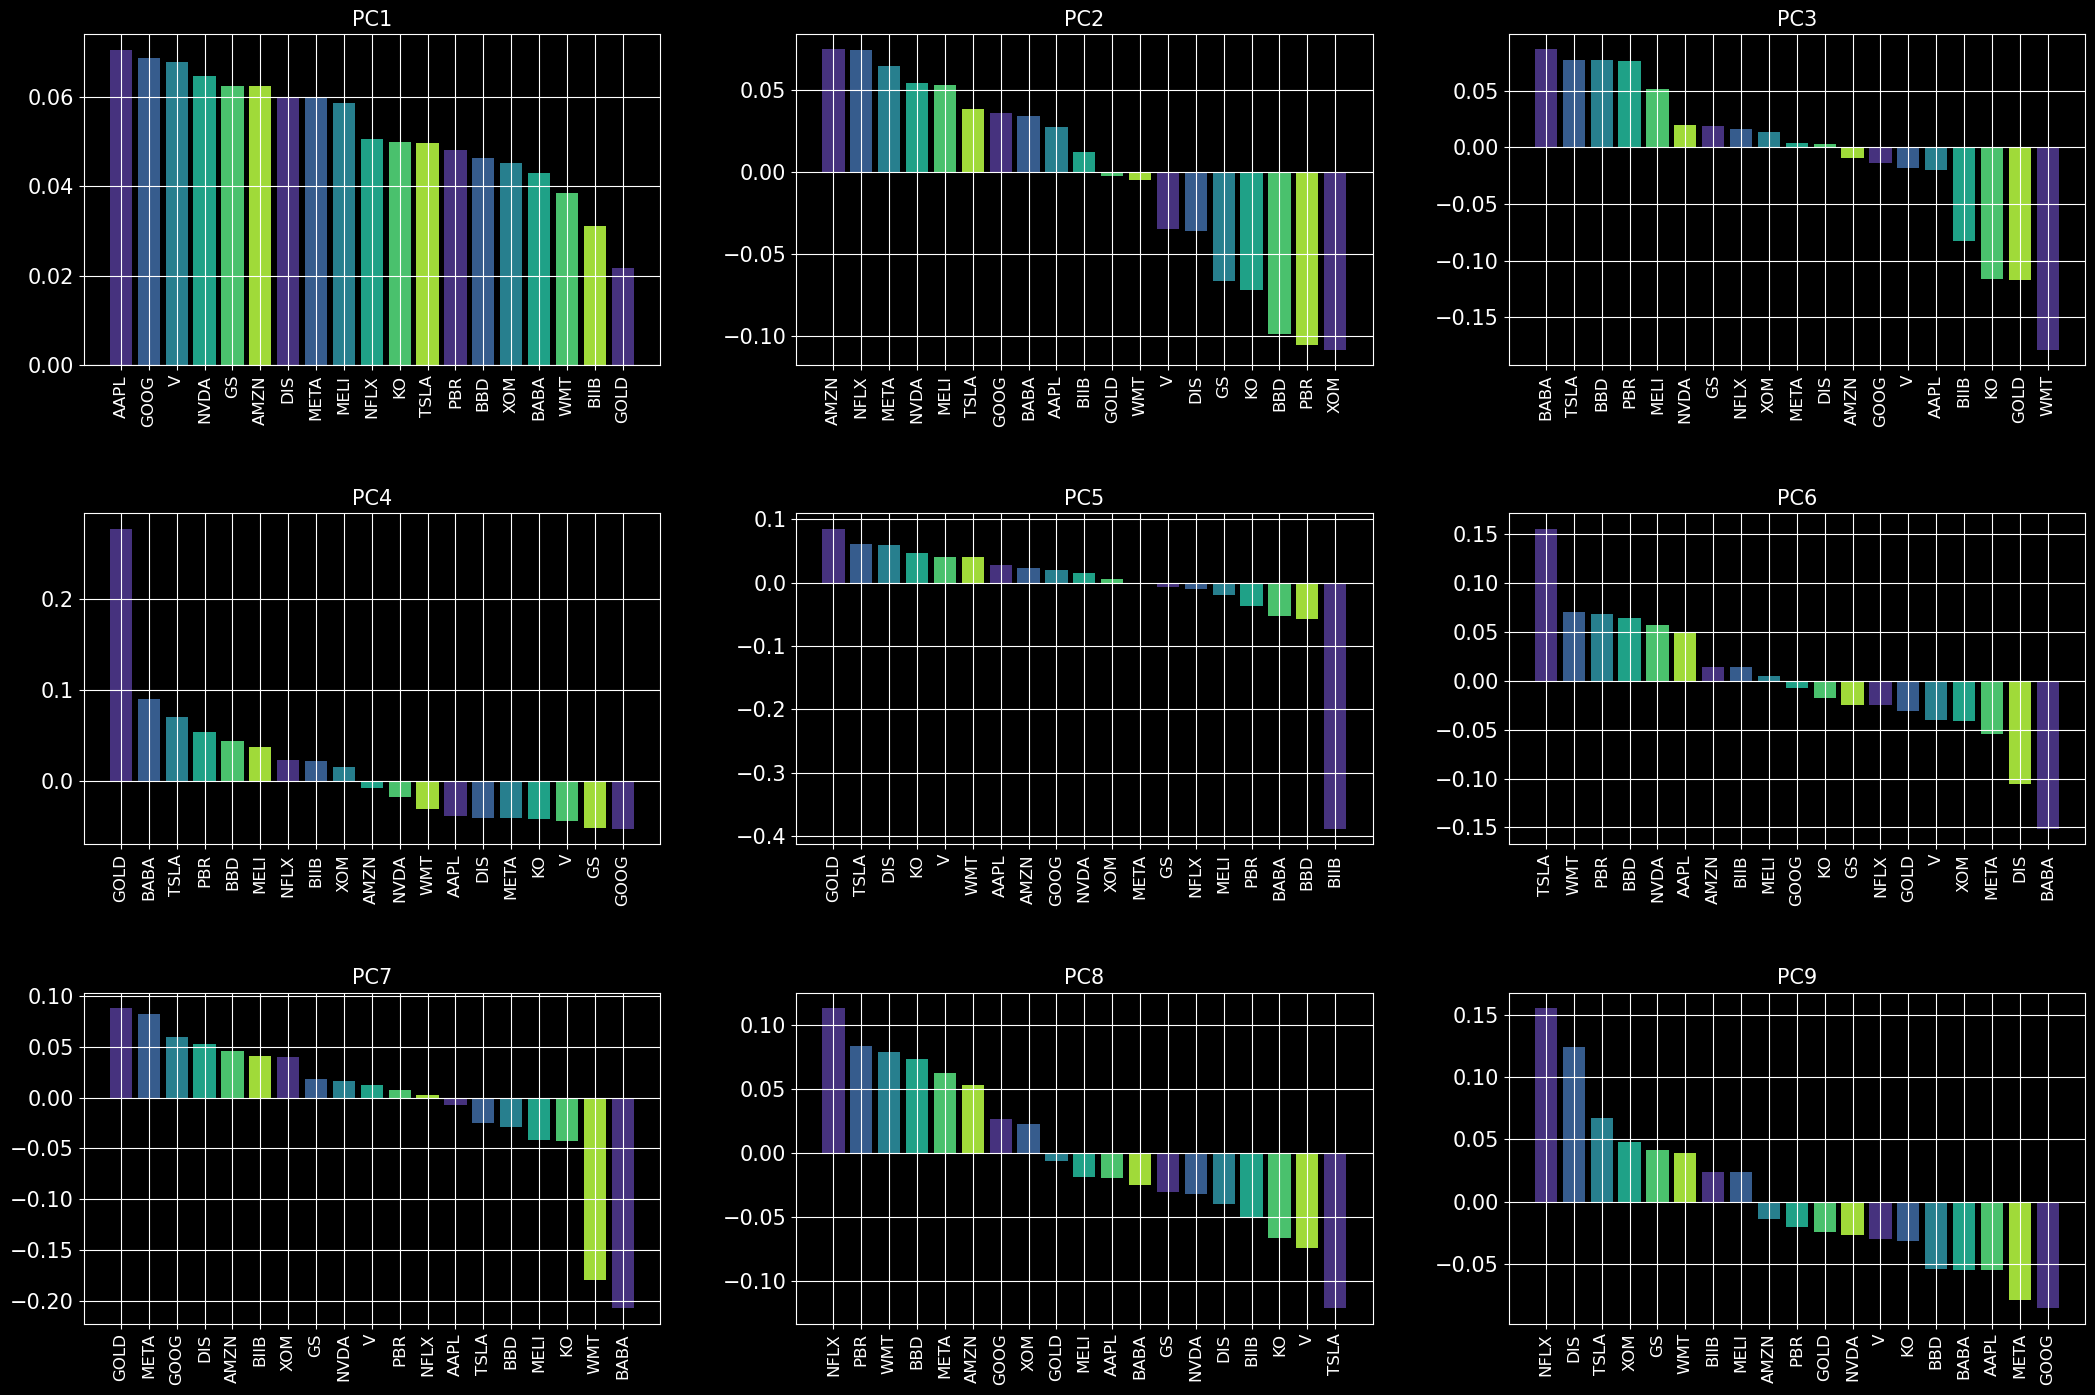

In [25]:
fig = plt.figure(figsize = (22,15))

for i in range(len(loadings.columns[:9])):
    plt.subplot(3,3,i+1)
    plt.bar(loadings.sort_values('PC'+str(i+1), ascending = False).index, loadings.sort_values('PC'+str(i+1), ascending = False)['PC'+str(i+1)], color = sns.color_palette(palette = 'viridis'))
    plt.title(loadings.columns.values[i], size = 15)
    plt.xticks(rotation = 90, size = 12)
    plt.grid(True)

plt.tight_layout(pad=3.0)

In [26]:
perf = prices/prices.iloc[0]

In [27]:
SP500 = yf.download(['SPY'], start=rets.index[0])['Adj Close']

[*********************100%***********************]  1 of 1 completed


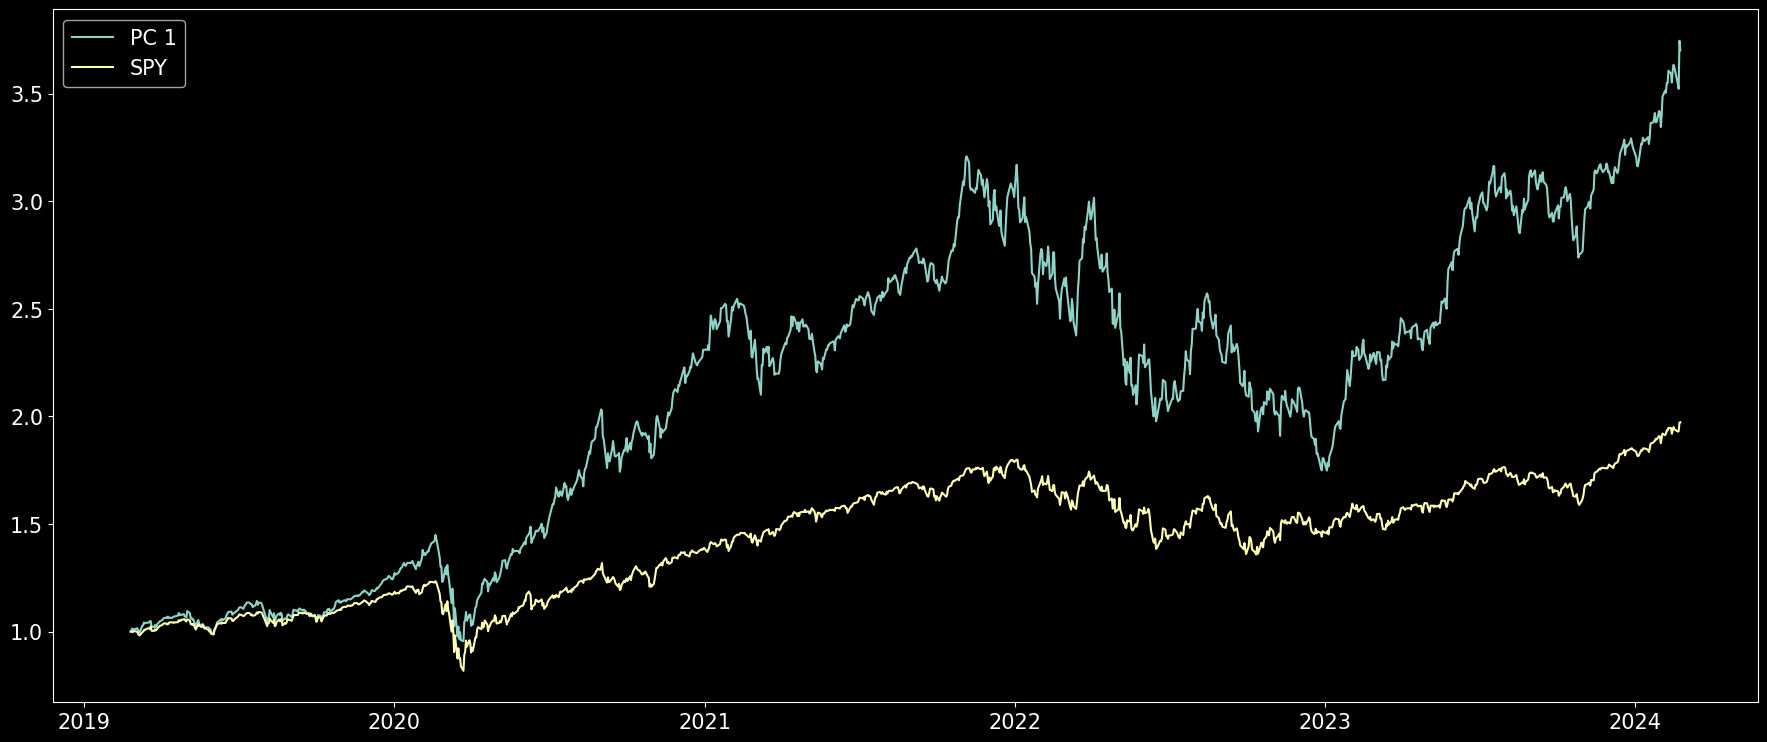

In [32]:
plt.figure(figsize = (22,9))
plt.plot(perf.dot(loadings['PC1']), label = "PC 1")
plt.plot(SP500/SP500.iloc[0], label = "SPY")
plt.legend(loc=0)
plt.show()

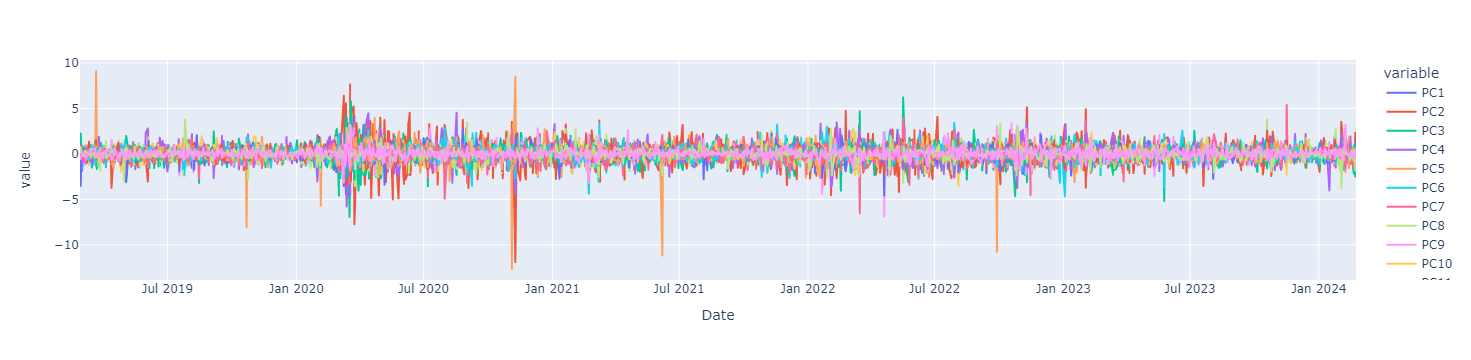

In [33]:
px.line(principal)

## Stock sentisivities to a factor

In [34]:
loadings_inverse = pd.DataFrame(np.linalg.inv(loadings.T), columns = loadings.columns, index = loadings.index)

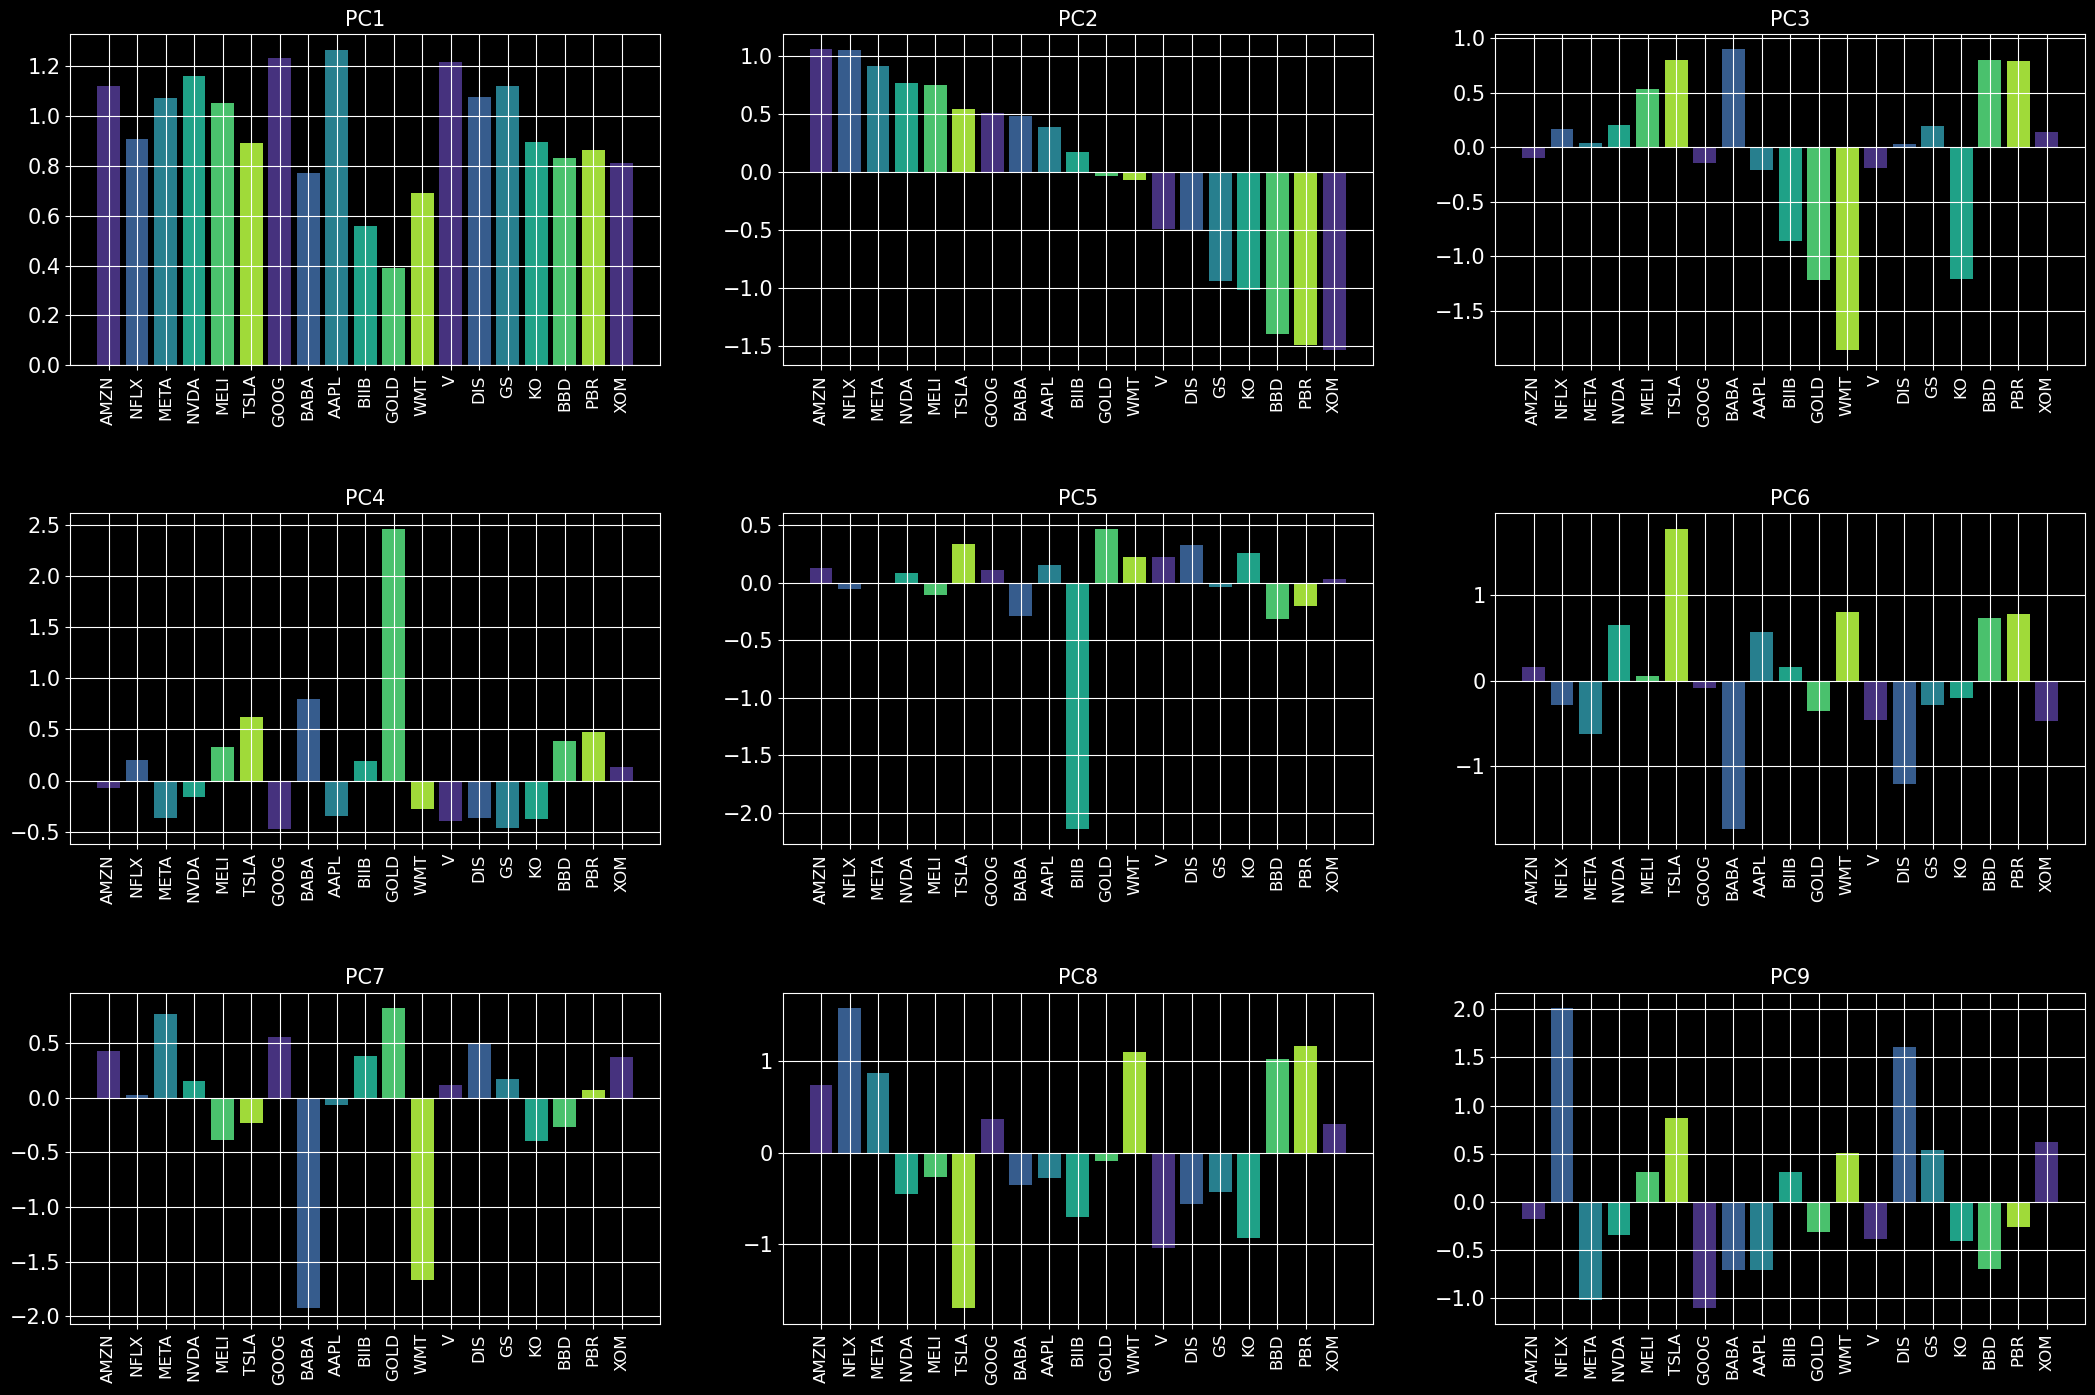

In [35]:
fig = plt.figure(figsize = (22,15))

for i in range(len(loadings_inverse.columns[:9])):
    plt.subplot(3,3,i+1)
    plt.bar(loadings_inverse.index, loadings_inverse['PC'+str(i+1)], color = sns.color_palette(palette = 'viridis'))
    plt.title(loadings_inverse.columns.values[i], size = 15)
    plt.xticks(rotation = 90, size = 12)
    plt.grid(True)

plt.tight_layout(pad=3.0)

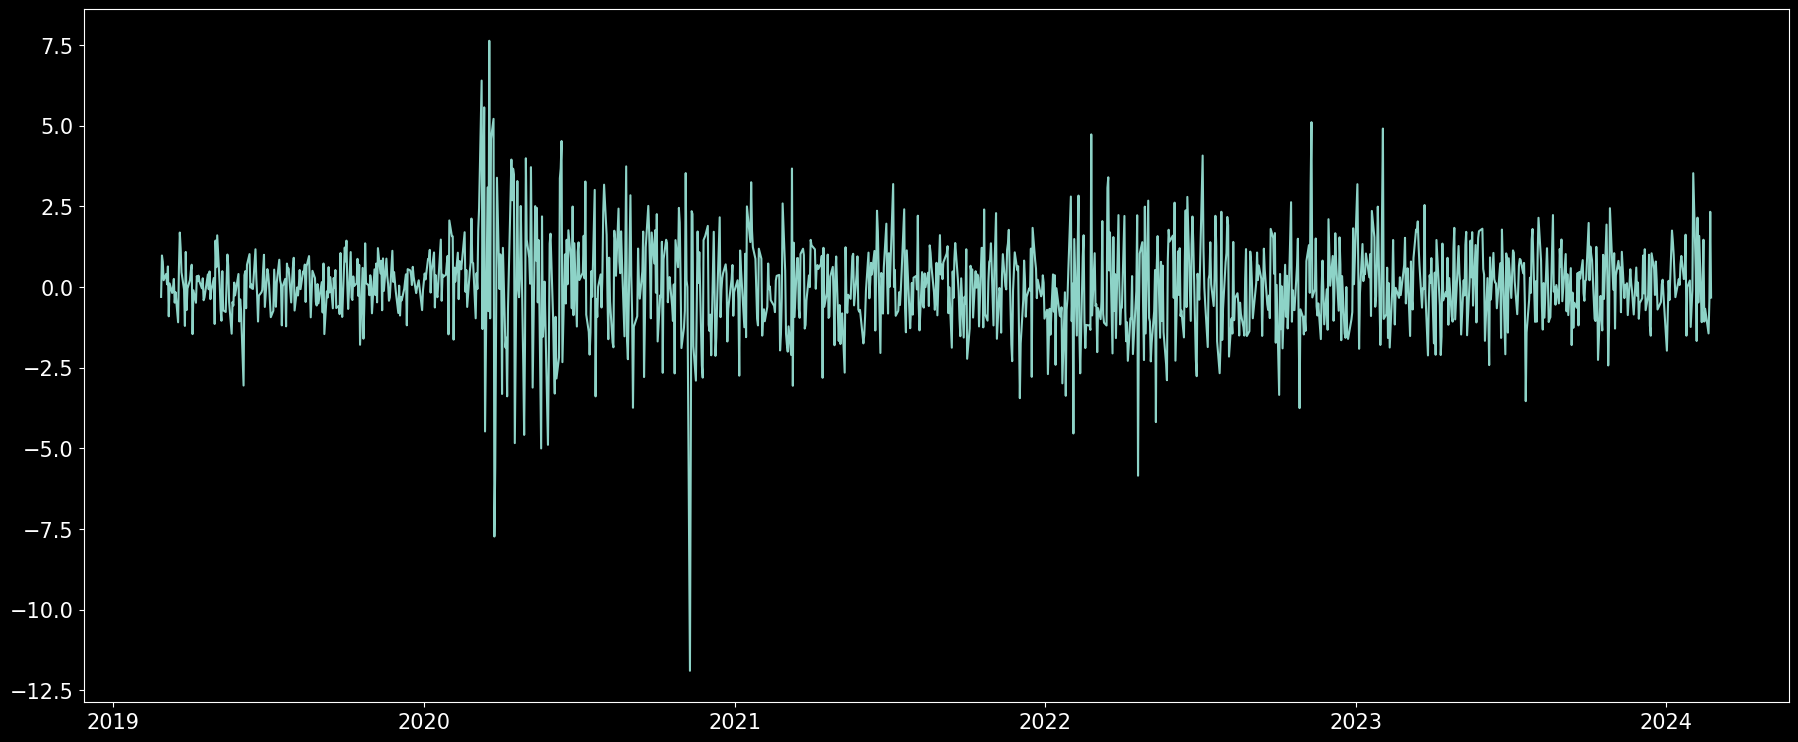

In [36]:
plt.figure(figsize = (22,9))
plt.plot(principal['PC2'])

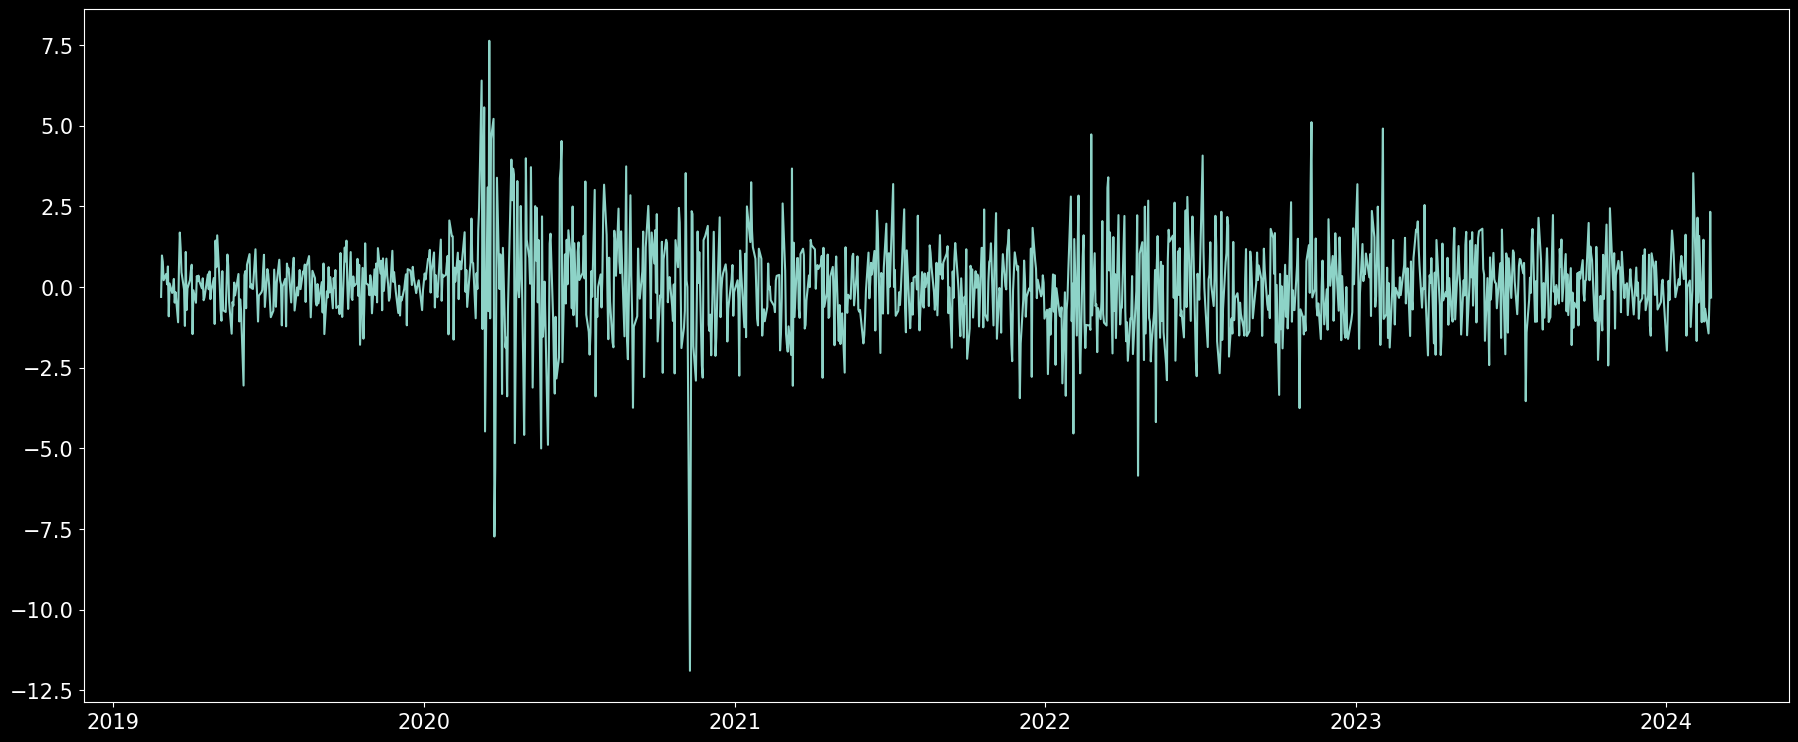

In [37]:
plt.figure(figsize = (22,9))
plt.plot(principal['PC2'])
#plt.plot((prices/prices.iloc[0])[['PBR', 'BBD']])

# PC1

In [38]:
SP500 = yf.download(['SPY'], start=rets.index[0])['Adj Close']

[*********************100%***********************]  1 of 1 completed


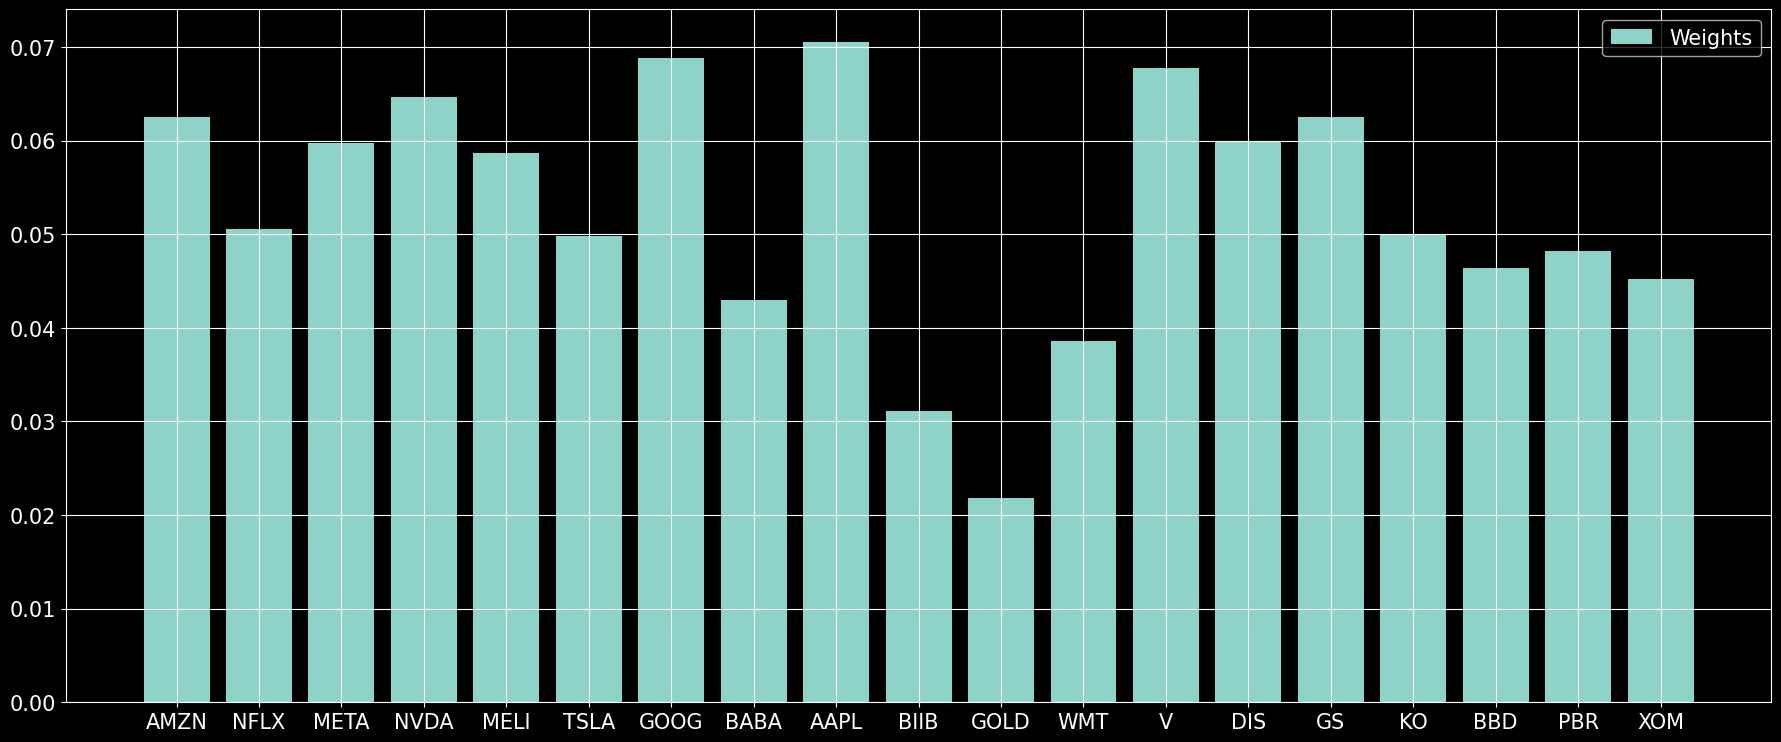

In [40]:
plt.figure(figsize = (22,9))
plt.bar(loadings['PC1'].index, loadings["PC1"])
plt.legend(['Weights'])
plt.grid()

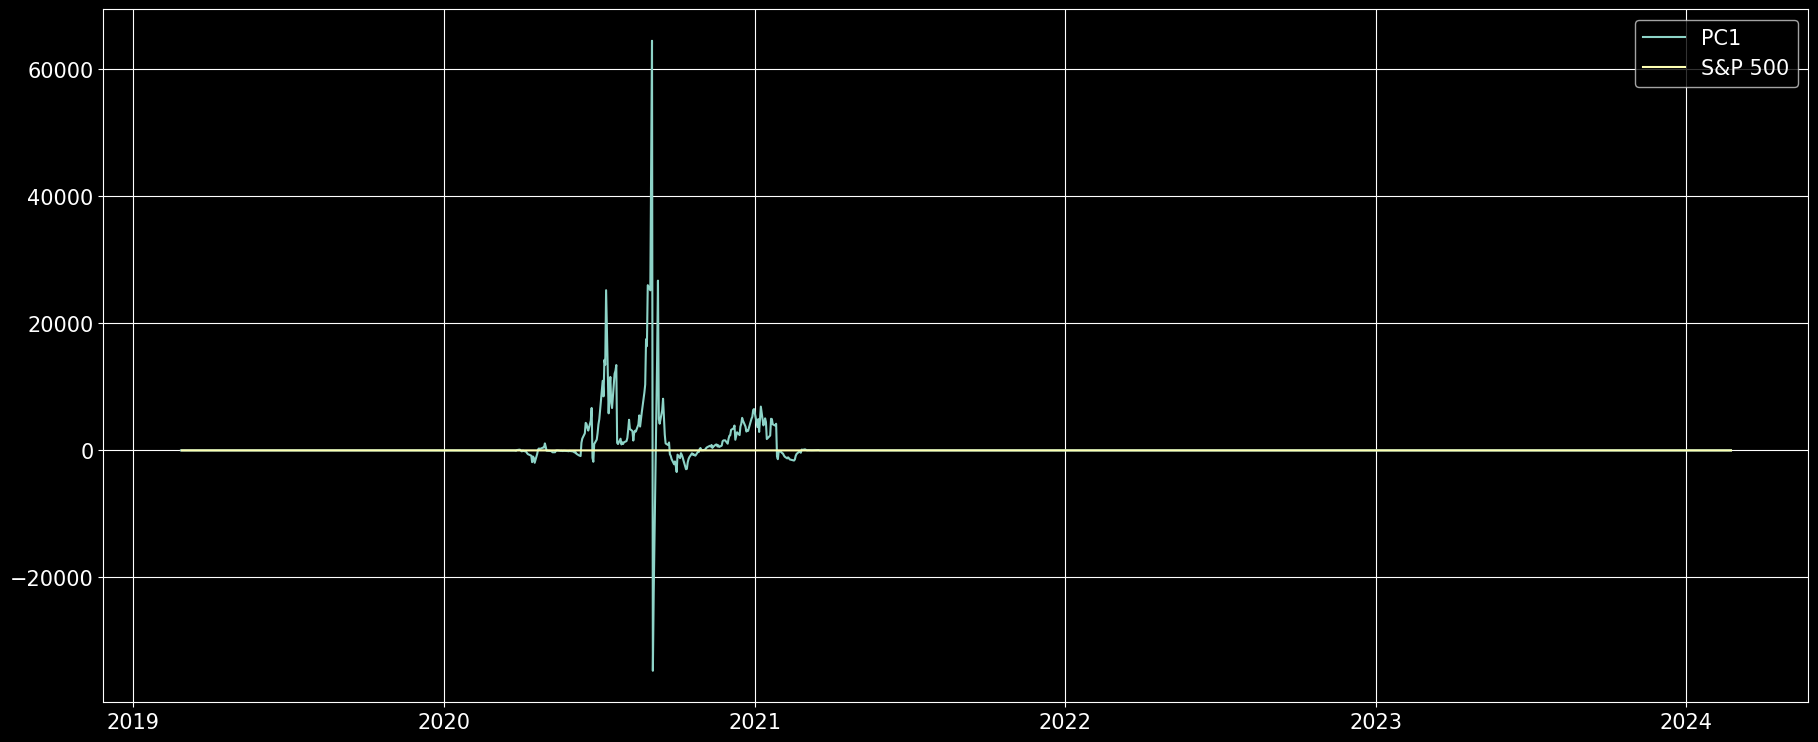

In [41]:
plt.figure(figsize = (22,9))
plt.plot((1 + principal['PC1']).cumprod(), label = 'PC1')
plt.plot((1 + SP500.pct_change()).cumprod(), label = 'S&P 500')
plt.legend()
plt.grid()

In [42]:
(1 + principal['PC2']).cumprod()

Date
2019-02-26    6.937578e-01
2019-02-27    1.371964e+00
2019-02-28    2.445993e+00
2019-03-01    2.960610e+00
2019-03-04    4.164823e+00
                  ...     
2024-02-16    1.524136e-49
2024-02-20   -6.683376e-50
2024-02-21   -3.878804e-50
2024-02-22   -1.292616e-49
2024-02-23   -8.723577e-50
Name: PC2, Length: 1258, dtype: float64

In [43]:
import plotly.express as px

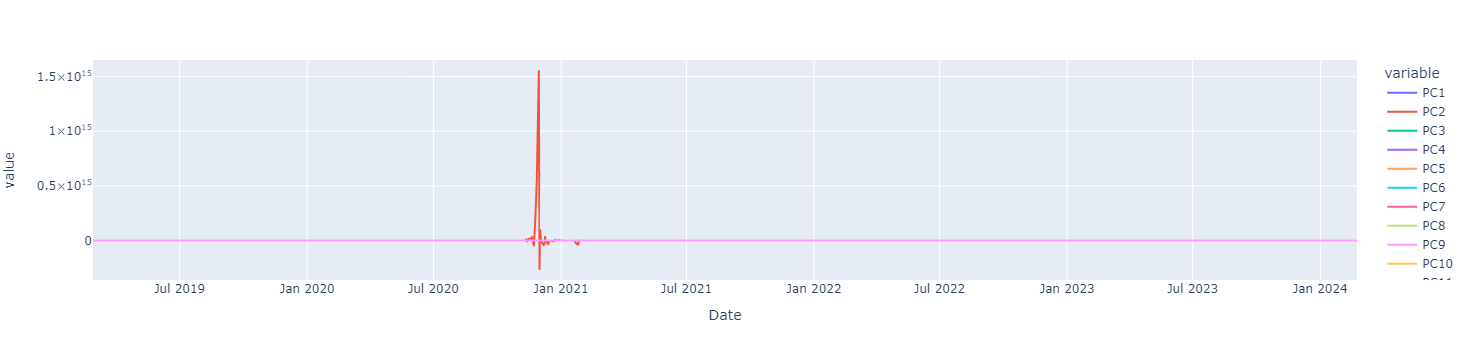

In [44]:
fig = px.line((1 + principal).cumprod())
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


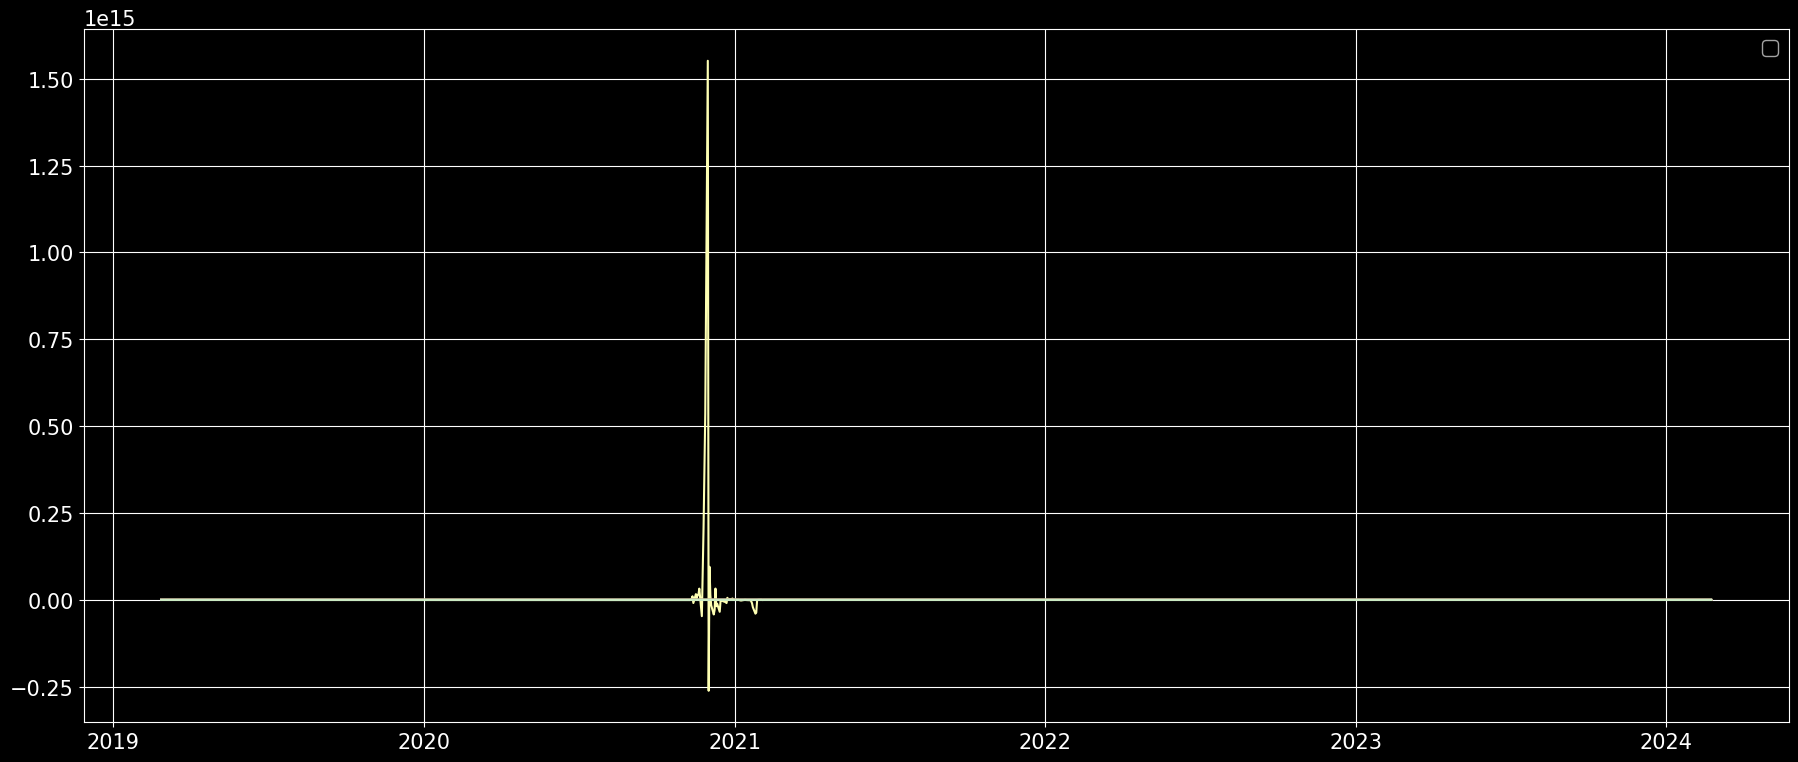

In [48]:
plt.figure(figsize = (22,9))
plt.plot((1 + principal).cumprod())
# plt.plot((1+rets['TEN']).cumprod(), label = 'TEN')
plt.legend()
plt.grid()

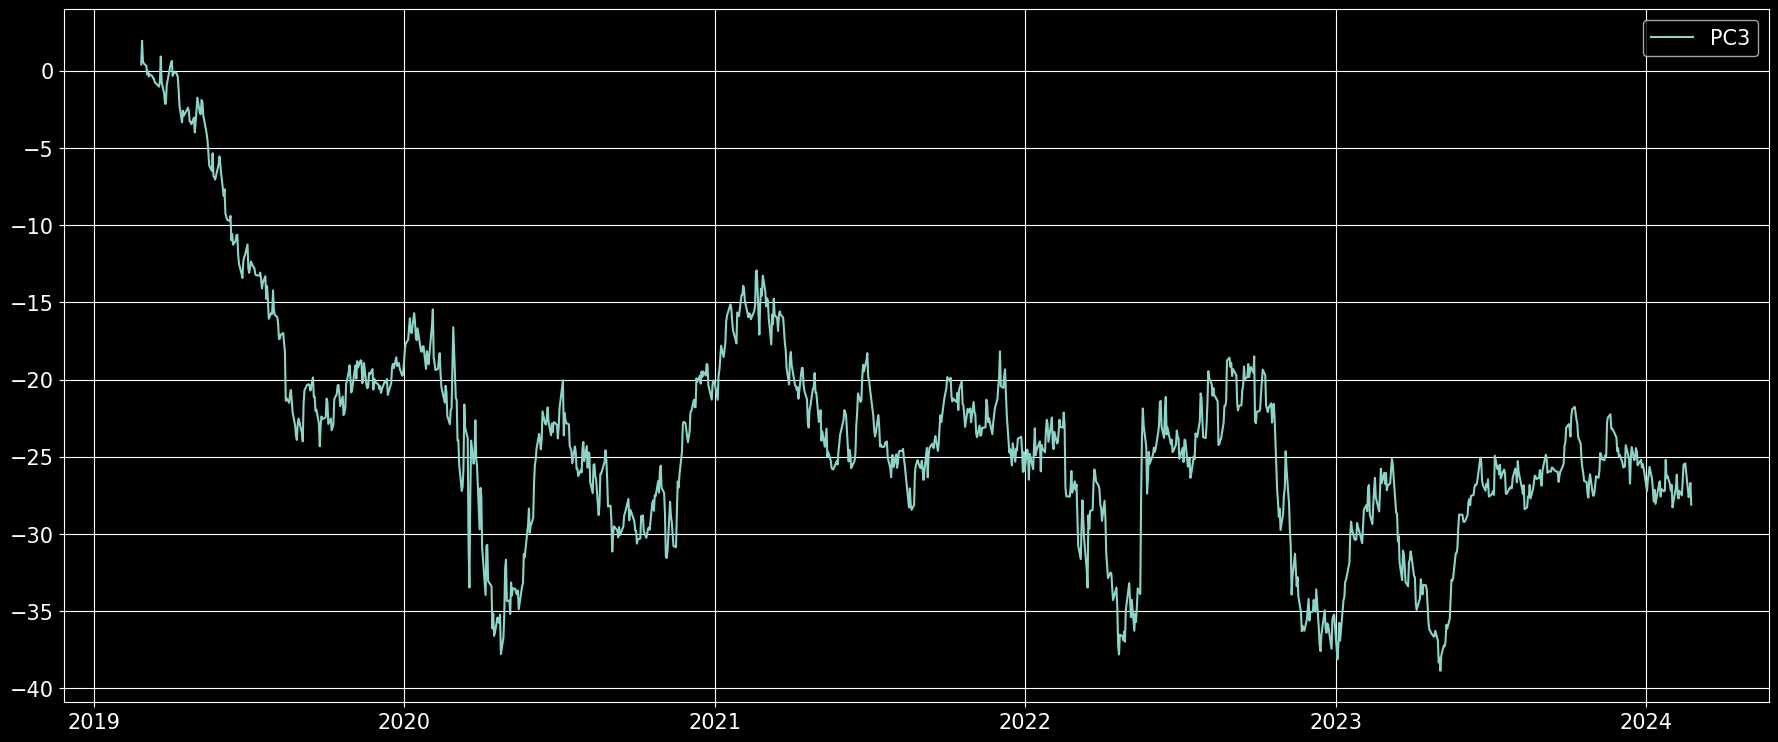

In [49]:
plt.figure(figsize = (22,9))
plt.plot(principal['PC3'].cumsum(), label = 'PC3')
plt.legend()
plt.grid()

# PCA

Let $X_{1t}, .. X_{nt}$ for $t = 1, .. T$ be the set of observed variables, we define the PCA as 
$$ Y_1 = a_1'X = a_{11}X_1 + a_{12}X_2 + ... + a_{1n}Xn $$

$$ Y_2 = a_2'X = a_{21}X_1 + a_{22}X_2 + ... + a_{2n}Xn $$
$$ . $$
$$ . $$
$$ Y_n = a_n'X = a_{n1}X_1 + a_{n2}X_2 + ... + a_{nn}Xn$$

Let $A$ be the matrix of weights of the above linear combinations, then $AA^T = I$. That is, $A$ is orthonormal.

With sklearn methodology we obtain $Y$ and $A$. But if we do $XA$ we do not obtain $Y$, but rather $Y'$.

What is the relation between $Y$ and $Y'$?

$Y$ is so such as:

$$YA^T + \bar{X} = X$$ where $\bar{X} = \frac{\sum{X}}{T}$

Since $Y' = XA$ and $AA^T = I$ 

We have that

$$Y' = Y + \bar{X}A$$

### Our methodology

We will use the $a_i$ given by the model, normalize them such as $\sum{a_i} =1$ and then find $Y = \sum{a_iXi}$